# Use MintPy to remove the tropo delays 

In [1]:
%pdb off
%matplotlib inline

import pygmt
import xarray as xr
from IPython.display import Image, display
import seaborn as sns

from mintpy.cli import view
from mintpy.cli import tsview
from mintpy.utils import readfile

from VLM.bzFRInGE.contrib import *
from VLM.bzFRInGE.contrib.FRINGEBase import ExpBase
from VLM.bzFRInGE.contrib.experiments import *
from VLM.bzFRInGE.contrib.ARIABase import ARIABase

from VLM.bzFRInGE.contrib.plotting import plotFringe, plotStack
from VLM.bzFRInGE.contrib.plotting.plotGMT import PlotVLM

print ('\nData is at:', os.getenv('dataroot'))
print (os.getenv('CONDA_PROMPT_MODIFIER'), datetime.now().date())

Automatic pdb calling has been turned OFF

Data is at: /u/leffe-data2/buzzanga/data/
(MintPy)  2023-03-22


In [2]:
exp       = NYC_ARIA
mp_exp    = 'Base_Fast' 
ref_sta   = DCT_REG[exp['root'].split('_')[0]][3][0] # VAHP (Force)
Exp       = ARIABase(exp, mp_exp, ref_sta) # to store in riht path

min_scoh  = 0.5
min_tcoh  = 0.2
boots     = 0
wgt_fn    = 'var' # var significantly improves tcoh
write_cfg = False

fs, ls    = (10, 10), 10

## Prep the ARIA stack for MintPy?

In [24]:
cmd = f'prep_aria.py -s {Exp.path_wd}/stack/ -ct {Exp.path_wd}/stack/troposphereTotal/HRRRStack.vrt'
cmd = f'{cmd} -d {Exp.path_wd}/DEM/SRTM_3arcsec.dem -i "{Exp.path_wd}/incidenceAngle/*.vrt"'
cmd = f'{cmd} -w {Exp.path_mask} -a "{Exp.path_wd}/azimuthAngle/*.vrt"'
cmd = f'{cmd} -o {Exp.path_mp_exp}/inputs/ifgramStack.h5 {Exp.path_mp_exp}/inputs/geometryGeo.h5'

print (cmd)
# !{cmd}


prep_aria.py -s /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC_ARIA/stack/ -ct /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC_ARIA/stack/HRRRStack.vrt -d /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC_ARIA/DEM/SRTM_3arcsec.dem -i "/u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC_ARIA/incidenceAngle/*.vrt" -w /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC_ARIA/mask/OSM_wmask.msk -a "/u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC_ARIA/azimuthAngle/*.vrt" -o /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC_ARIA/inputs/ifgramStack.h5 /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC_ARIA/inputs/geometryGeo.h5


In [3]:
path_tropo = f'{Exp.path_mp_exp}/inputs/HRRR.h5'

tsview.py /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC_ARIA/NJHT_Base_Fast/inputs/HRRR.h5 -n 1 --ms 4 -u m -c cmc.imola
open timeseries file: HRRR.h5
No lookup table (longitude or rangeCoord) found in files.
data   coverage in y/x: (0, 0, 498, 352)
subset coverage in y/x: (0, 0, 498, 352)
data   coverage in lat/lon: (-74.171220331, 40.823733671, -73.756220497, 40.530400455)
subset coverage in lat/lon: (-74.171220331, 40.823733671, -73.756220497, 40.530400455)
------------------------------------------------------------------------
estimate deformation model with the following assumed time functions:
    polynomial : 1
    periodic   : []
    stepDate   : []
    exp        : {}
    log        : {}
reading timeseries from file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC_ARIA/NJHT_Base_Fast/inputs/HRRR.h5
data    range: [-3.725573, -3.2917774] m
display range: [-3.717679, -3.2968533] m
create figure for map in size of [9.2, 6.0]


<IPython.core.display.Javascript object>


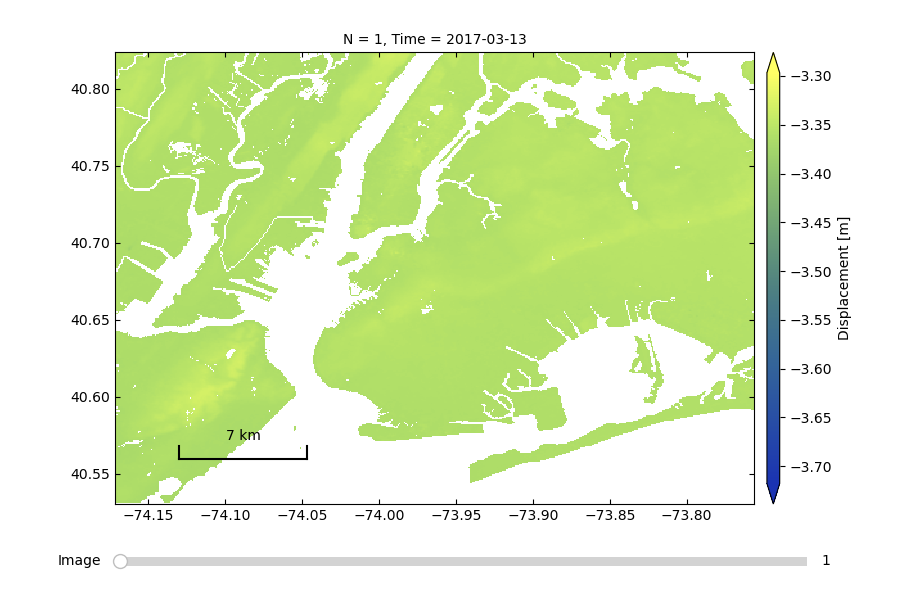

display data in transparency: 1.0
plot in geo-coordinate
plotting image ...
plot scale bar: [0.2, 0.2, 0.1]
create figure for point in size of [8.0, 4.5]


/u/leffe-data2/buzzanga/Miniconda3/envs/MintPy/lib/python3.10/site-packages/ipykernel/comm/comm.py:79: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  warn(


<IPython.core.display.Javascript object>


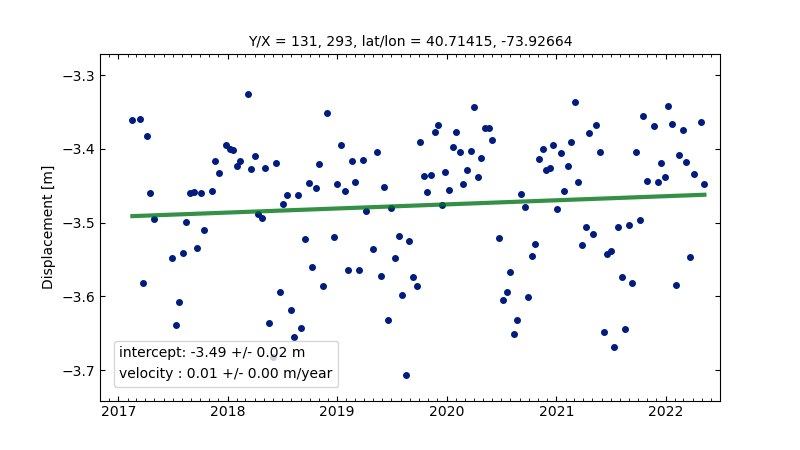

/u/leffe-data2/buzzanga/Miniconda3/envs/MintPy/lib/python3.10/site-packages/ipykernel/comm/comm.py:79: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  warn(


showing ...

------------------------------------------------------------------------
To scroll through the image sequence:
1) Move the slider, OR
2) Press left or right arrow key (if not responding, click the image and try again).
------------------------------------------------------------------------


In [4]:
# note that the GPS value is not added
%matplotlib notebook
cmd  = f'{path_tropo} -n 1 --ms 4 -u m -c cmc.imola '# -v -25 25 --ylim -25 25 -c roma_r '
# cmd += f'--periodic 1.0 0.5 '
# cmd += f'--lalo 40.714048 -73.921894 '
# cmd += f' --ref-lalo 40.731134 -74.037577 '

tsview.main(cmd.split())

In [18]:
# compare with GACOS for sanity check
exp       = NYC_ARIA0
mp_exp    = 'GACOS_Fast' 
ref_sta   = DCT_REG[exp['root'].split('_')[0]][3][0] # VAHP (Force)
Exp1      = ARIABase(exp, mp_exp, ref_sta) # to store in riht path

path_gacos = op.join(op.dirname(Exp1.path_tropoGeo), 'GACOS.h5')

tsview.py /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC_ARIA0/NJHT_GACOS_Fast/inputs/GACOS.h5 -n 1 --ms 4 -u m -c cmc.imola
open timeseries file: GACOS.h5
No lookup table (longitude or rangeCoord) found in files.
data   coverage in y/x: (0, 0, 1532, 1052)
subset coverage in y/x: (0, 0, 1532, 1052)
data   coverage in lat/lon: (-74.327053602, 41.210400183, -73.050387446, 40.333733867)
subset coverage in lat/lon: (-74.327053602, 41.210400183, -73.050387446, 40.333733867)
------------------------------------------------------------------------
total number of pixels: 2.4E+08
* multilook 3 by 3 with nearest interpolation for display to save memory
estimate deformation model with the following assumed time functions:
    polynomial : 1
    periodic   : []
    stepDate   : []
    exp        : {}
    log        : {}
reading timeseries from file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC_ARIA0/NJHT_GACOS_Fast/inputs/GACOS.h5 with step of 3 by 3
reading 2D slices 150/150...
data    range: [

<IPython.core.display.Javascript object>


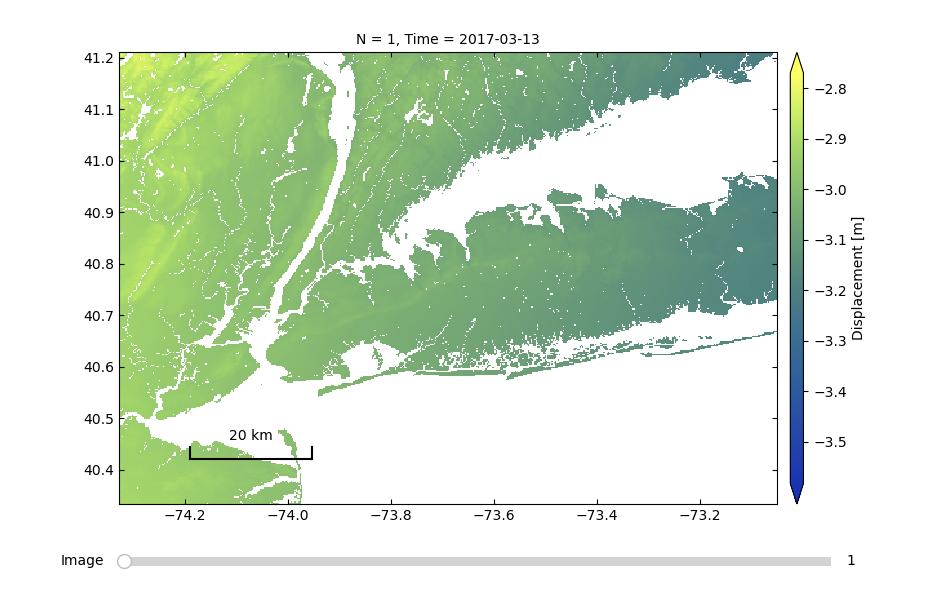

display data in transparency: 1.0
plot in geo-coordinate
plotting image ...
plot scale bar: [0.2, 0.2, 0.1]


/u/leffe-data2/buzzanga/Miniconda3/envs/MintPy/lib/python3.10/site-packages/ipykernel/comm/comm.py:79: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  warn(


create figure for point in size of [8.0, 4.5]


<IPython.core.display.Javascript object>


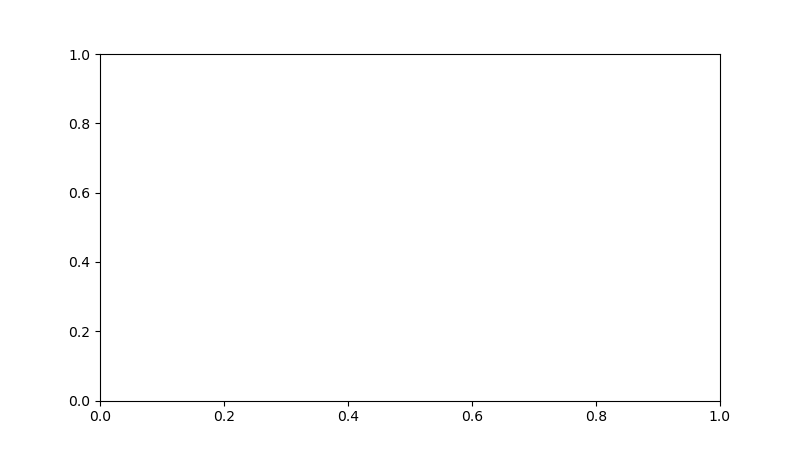

showing ...

------------------------------------------------------------------------
To scroll through the image sequence:
1) Move the slider, OR
2) Press left or right arrow key (if not responding, click the image and try again).
------------------------------------------------------------------------


/u/leffe-data2/buzzanga/Miniconda3/envs/MintPy/lib/python3.10/site-packages/ipykernel/comm/comm.py:79: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  warn(


In [19]:
# note that the GPS value is not added
%matplotlib notebook
cmd  = f'{path_gacos} -n 1 --ms 4 -u m -c cmc.imola '# -v -25 25 --ylim -25 25 -c roma_r '
# cmd += f'--periodic 1.0 0.5 '
# cmd += f'--lalo 40.714048 -73.921894 '
# cmd += f' --ref-lalo 40.731134 -74.037577 '

tsview.main(cmd.split())

In [4]:
readfile.read(Exp.path_ifgramStack)[1]

{'ALOOKS': '7',
 'ANTENNA_SIDE': '-1',
 'CENTER_LINE_UTC': '82261.0',
 'EARTH_RADIUS': '6337286.638938101',
 'FILE_LENGTH': '352',
 'FILE_TYPE': 'ifgramStack',
 'HEADING': '-12',
 'HEIGHT': '693000.0',
 'LAT_REF1': '40.530400454500004',
 'LAT_REF2': '40.530400454500004',
 'LAT_REF3': '40.823733670500005',
 'LAT_REF4': '40.823733670500005',
 'LENGTH': '352',
 'LON_REF1': '-74.1712203315',
 'LON_REF2': '-73.7562204975',
 'LON_REF3': '-74.1712203315',
 'LON_REF4': '-73.7562204975',
 'NCORRLOOKS': '61.29302259485575',
 'NUMBER_OF_PAIRS': '566',
 'ORBIT_DIRECTION': 'ASCENDING',
 'PLATFORM': 'Sen',
 'PROCESSOR': 'isce',
 'RANGE_PIXEL_SIZE': '44.26168155670166',
 'RLOOKS': '19',
 'STARTING_RANGE': '798980.125',
 'UTCTime (HH:MM:SS.ss)': '22:51:01.000000',
 'WAVELENGTH': '0.05546576',
 'WIDTH': '498',
 'Wavelength (m)': '0.05546576',
 'X_FIRST': '-74.171220331',
 'X_STEP': '0.000833333',
 'X_UNIT': 'degrees',
 'Y_FIRST': '40.823733671',
 'Y_STEP': '-0.000833333',
 'Y_UNIT': 'degrees',
 'endRan

In [ ]:
readfile.read(Exp.path_tropoGeo)

In [7]:
!reference_date.py {Exp.path_tropoGeo} --ref-date 20170217

input reference date: 20170217
--------------------------------------------------
change reference date for file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC_ARIA/NJHT_Base_Fast/inputs/HRRR.h5
reading data ...
referencing in time ...
--------------------------------------------------
open  HDF5 file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC_ARIA/NJHT_Base_Fast/inputs/HRRR.h5 in r+ mode
writing dataset /timeseries                block: (0, 147, 0, 352, 0, 498)
close HDF5 file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC_ARIA/NJHT_Base_Fast/inputs/HRRR.h5.
update "REF_DATE" attribute value to 20170217
time used: 00 mins 1.4 secs.


In [8]:
lalo = [float(c) for c in DCT_GPS[ref_sta].split()]

In [10]:
!reference_point.py {Exp.path_tropoGeo} -l {lalo[0]} -L {lalo[1]}

--------------------------------------------------
input reference point in lat/lon: (40.731134, -74.037577)
input reference point in y/x: (111, 160)
--------------------------------------------------
calculating the temporal average of timeseries file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC_ARIA/NJHT_Base_Fast/inputs/HRRR.h5
reading timeseries data from file: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC_ARIA/NJHT_Base_Fast/inputs/HRRR.h5 ...
/u/leffe-data2/buzzanga/Software_InSAR/MintPy_git/src/mintpy/objects/stack.py:455: RuntimeWarning: Mean of empty slice
  dmean = np.nanmean(data, axis=0)
updating dataset values without re-writing to a new file
update metadata


In [ ]:
!diff.py timeseries_demErr.h5 inputs/solidEarthTide.h5  -o tiemseries_SET.h5